In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<ipython-input-5-39bcebd66f40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])
<ipython-input-5-39bcebd66f40>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

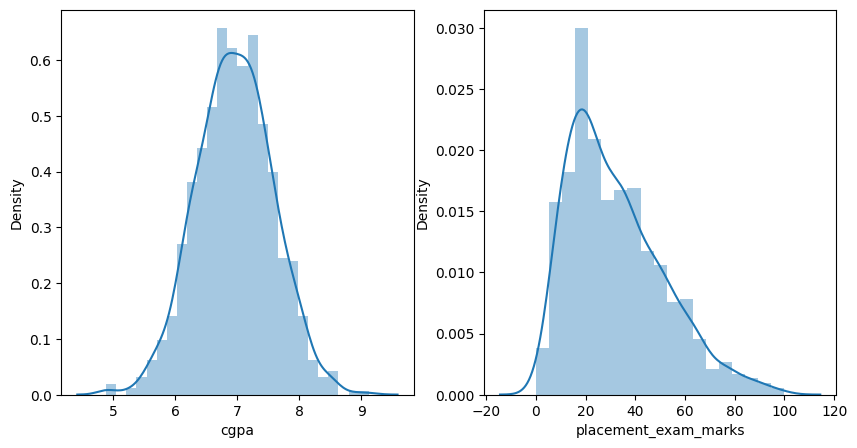

In [5]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.distplot(df["cgpa"])
plt.subplot(122)
sns.distplot(df["placement_exam_marks"])

In [6]:
print("Mean value of CGPA:",df["cgpa"].mean())
print("Std of CGPA:",df["cgpa"].std())
print("Min value of CGPA:",df["cgpa"].min())
print("Max value of CGPA:",df["cgpa"].max())

Mean value of CGPA: 6.96124
Std of CGPA: 0.6158978751323894
Min value of CGPA: 4.89
Max value of CGPA: 9.12


In [7]:
## Finding the Boundry Values
print("Highest Allowed:",df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest Allowed:",df["cgpa"].mean() - 3*df["cgpa"].std())

Highest Allowed: 8.808933625397168
Lowest Allowed: 5.113546374602832


In [11]:
out = df[(df["cgpa"] > 8.808) | (df["cgpa"] < 5.1135)]

<Axes: xlabel='cgpa', ylabel='placement_exam_marks'>

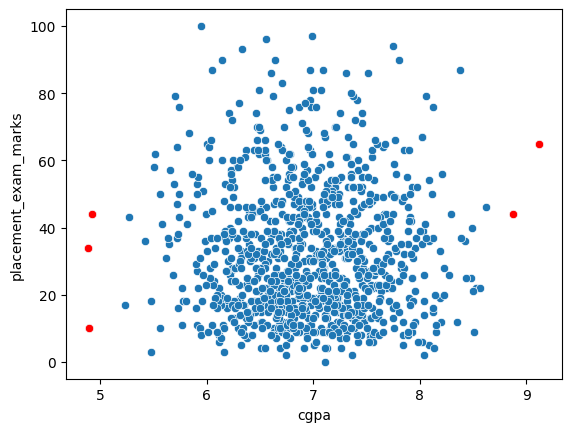

In [14]:
sns.scatterplot(data = df , x = "cgpa" , y = "placement_exam_marks")
sns.scatterplot(data = out , x = "cgpa" , y = "placement_exam_marks" , color = "red" , markers= "*")

# **Trimming**

In [17]:
new_df = df[(df["cgpa"] < 8.808) & (df["cgpa"] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [18]:
## Aproach 2

## Finding Z -Score

df["cgpa_zscore"] = (df["cgpa"] - df["cgpa"].mean()) / df["cgpa"].std()
df.sample(10)

,cgpa,placement_exam_marks,placed,cgpa_zscore
679,6.70,35.0,0,-0.424161
140,6.85,22.0,1,-0.180614
472,6.19,38.0,1,-1.252221
97,7.33,52.0,1,0.598736
494,6.83,51.0,0,-0.213087
992,6.26,12.0,0,-1.138565
839,6.44,24.0,1,-0.846309
374,7.34,41.0,0,0.614972
737,6.52,12.0,1,-0.716417
446,6.60,23.0,1,-0.586526


In [19]:
df[df["cgpa_zscore"] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [20]:
df[df["cgpa_zscore"] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
df[(df["cgpa_zscore"] > 3) | (df["cgpa_zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [23]:
### Trimming

new_df = df[(df["cgpa_zscore"] < 3) & (df["cgpa_zscore"] > -3)]

In [24]:
new_df.shape

(995, 4)

In [25]:
new_df.sample(10)

,cgpa,placement_exam_marks,placed,cgpa_zscore
438,7.31,7.0,0,0.566263
395,7.29,11.0,0,0.533790
444,6.66,14.0,1,-0.489107
893,7.07,32.0,1,0.176588
482,7.56,8.0,0,0.972174
304,7.12,33.0,1,0.257770
215,7.72,22.0,0,1.231957
949,7.94,11.0,0,1.589160
460,6.91,4.0,1,-0.083196
740,6.21,74.0,1,-1.219748


# **Capping**

In [26]:
upper_limit = df["cgpa"].mean() + 3 * df["cgpa"].std()
lower_limit = df["cgpa"].mean() - 3 * df["cgpa"].std()

In [27]:
df["cgpa"] = np.where(df["cgpa"] > upper_limit , upper_limit ,
                      np.where(df["cgpa"] < lower_limit , lower_limit , df["cgpa"]))

In [28]:
df.shape

(1000, 4)

In [30]:
df["cgpa"].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934
